In [2]:
# importing libriaries

import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report


## Question 1

Load the dataset and show the class distribution.

In [3]:
# loading the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


Provide basic text
statistics.

In [4]:
# doing the basic text statistics
total_messages = len(df)
spam_messages = df['v1'].value_counts().get('spam', 0)
ham_messages = df['v1'].value_counts().get('ham', 0)
avg_length = df['v2'].apply(len).mean()

# printing those values
print(f"Total messages: \t{total_messages}")
print(f"Spam messages: \t{spam_messages} \t{spam_messages / total_messages * 100:.2f}%")
print(f"Ham messages: \t{ham_messages} \t{ham_messages / total_messages * 100:.2f}%")
print(f"Avg message len: {avg_length:.2f} chars")

Total messages: 	5572
Spam messages: 	747 	13.41%
Ham messages: 	4825 	86.59%
Avg message len: 80.12 chars


Perform Text cleaning: lowercasing, removing
punctuation, URLs, numbers, and extra whitespace.

In [5]:
# funcetion to clean a column
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# applying the clean text function
df['cleaned_v2'] = df['v2'].apply(clean_text)
df[['v2', 'cleaned_v2']].head()

,v2,cleaned_v2
0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...
3,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


Tokenization:
split text into words.

In [6]:
# tokenixation
df['tokens'] = df['cleaned_v2'].apply(lambda x: x.split())
df[['cleaned_v2', 'tokens']].head()

,cleaned_v2,tokens
0,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


Remove stop words.

In [7]:
# stop word removal
df['tokens_nostop'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])
df[['tokens', 'tokens_nostop']].head()

,tokens,tokens_nostop
0,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


Apply stemming or
lemmatization.

In [8]:
# stemming
stemmer = PorterStemmer()
df['tokens_stemmed'] = df['tokens_nostop'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

# lemmatization
lemmatizer = WordNetLemmatizer()
df['tokens_lemmatized'] = df['tokens_stemmed'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

df[['tokens_nostop', 'tokens_stemmed', 'tokens_lemmatized']].head()

,tokens_nostop,tokens_stemmed,tokens_lemmatized
0,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,"[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,"[free, entry, wkly, comp, win, fa, cup, final,...","[free, entri, wkli, comp, win, fa, cup, final,...","[free, entri, wkli, comp, win, fa, cup, final,..."
3,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,"[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, goe, usf, live, around, tho..."


Generate TF-IDF features from the processed text.

In [9]:
import warnings
warnings.filterwarnings('ignore')

# building the tfidf model
tfidf = TfidfVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x, lowercase=False)
X_tfidf = tfidf.fit_transform(df['tokens_lemmatized'])
print(f"TF-IDF feature shape: {X_tfidf.shape}")

TF-IDF feature shape: (5572, 7071)


Experiment with word n-grams. Explain your feature choices
briefly.

In [10]:
tfidf_ngrams = TfidfVectorizer(
    tokenizer=lambda x: x,
    preprocessor=lambda x: x,
    lowercase=False,
    ngram_range=(1, 3) 
)
X_tfidf_ngrams = tfidf_ngrams.fit_transform(df['tokens_stemmed'])
print(f"TF-IDF n-gram feature shape: {X_tfidf_ngrams.shape}")

# i choose to use n-grams with tfidf beacuse it helps us capture context and relationships between words.
# this can help up increase the models ability to understand more clearly.

TF-IDF n-gram feature shape: (5572, 69707)


## Question 2

Build at least two classification models.

In [11]:
# encoding target variables
y = df['v1'].map({'ham': 0, 'spam': 1})

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_tfidf, y, test_size=0.5, random_state=72)

# model 1 - logistic regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# model 1 - logistic regression less data
lr2 = LogisticRegression(max_iter=800)
lr2.fit(X_train_2, y_train_2)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,800
,multi_class,'deprecated'


Evaluate models using
Accuracy, Precision, Recall, F1-Score, Confusion Matrix, ROC
&AUC Curve.

In [12]:
# making a fn to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred_lr = model.predict(X_test)
    y_proba_lr = model.predict_proba(X_test)[:, 1]

    print("Model: ", model)

    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
    print("Classification Report:\n", classification_report(y_test, y_pred_lr))

    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
    auc_lr = roc_auc_score(y_test, y_proba_lr)
    plt.figure()
    plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

    return accuracy_score(y_test, y_pred_lr), precision_score(y_test, y_pred_lr), recall_score(y_test, y_pred_lr), f1_score(y_test, y_pred_lr)

Model:  LogisticRegression(max_iter=1000)
Confusion Matrix:
 [[961   4]
 [ 50 100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.96      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



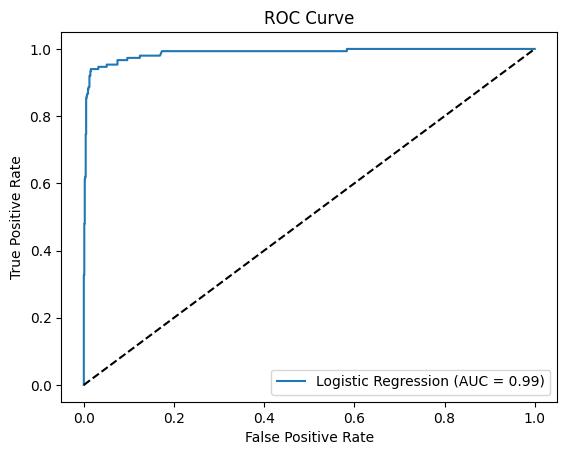

Model:  LogisticRegression(max_iter=800)
Confusion Matrix:
 [[2405    0]
 [ 143  238]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2405
           1       1.00      0.62      0.77       381

    accuracy                           0.95      2786
   macro avg       0.97      0.81      0.87      2786
weighted avg       0.95      0.95      0.94      2786



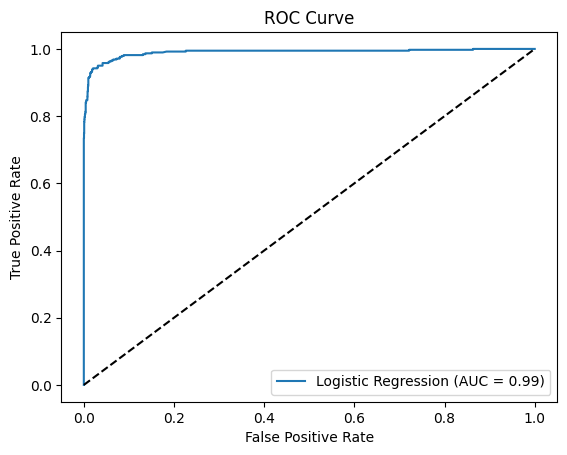

                              Accuracy  Precision    Recall  F1-Score
LogisticRegression            0.951570   0.961538  0.666667  0.787402
LogisticRegression less data  0.948672   1.000000  0.624672  0.768982


In [13]:
# Evaluate both logistic regression models and show results in a table
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

results = []
acc, prec, rec, f1 = evaluate_model(lr, X_test, y_test)
results.append([acc, prec, rec, f1])

acc2, prec2, rec2, f12 = evaluate_model(lr2, X_test_2, y_test_2)
results.append([acc2, prec2, rec2, f12])

results_df = pd.DataFrame(results, columns=metrics, index=['LogisticRegression', 'LogisticRegression less data'])
print(results_df)

Compare model performance and select the best one.

Based on the results, the first Logistic Regression model (trained on more data) performed slightly better overall. It achieved higher accuracy and F1-score, while maintaining strong precision. 

Although the second model had perfect precision, its recall and F1-score were lower, indicating it missed more spam messages. 


Therefore, the first Logistic Regression model is preferred for balanced spam detection performance.

## Question 3

Based on your results, which model performed the best and why?
Identify terms or features that strongly influence spam detection.
Suggest potential improvements or practical deployment
considerations. Interpret your findings and provide business
implications.

In [14]:
# getting the top tf idf terms
spam_indices = df[df['v1'] == 'spam'].index
spam_tfidf = X_tfidf[spam_indices].mean(axis=0).A1
top_indices = np.argsort(spam_tfidf)[-10:][::-1]
top_terms = [tfidf.get_feature_names_out()[i] for i in top_indices]
top_terms

['call', 'å', 'free', 'txt', 'mobil', 'claim', 'text', 'prize', 'stop', 'ur']

Potential Improvements & Deployment Considerations

- Model Improvements
    - using more advanced models like random forest or deep learning.
    - different ways of data preprocessing
    - tuning the hyper parameters.

- Deployment Considerations
    - trying to detect drifts.
    - trying to retain periodically with new data to adapt to evolving spam tactics.
    - low latency for real-time spam detection.
    - integrate with existing messaging platforms via APIs.
    - implement logging and alerting for suspicious activity.

Interpretation & Business Implications

- model balances precision and recall, minimizing both false positives and false negatives.
- key spam indicators include terms like "free", "call", "prize", and "claim".
- spam detection protects users, reduces fraud risk, and improves customer trust.

In [15]:
df.to_csv('spam_processed.csv', index=False)